In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load Ground Truth

In [2]:
# load json test_data_annotations.json
with open('test_data_annotations.json') as f:
    ground_truth = json.load(f)
ground_truth

{'0': ['3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes'],
 '1': ['3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d_printed_clothes',
  '3d

# Load Predictions

In [3]:
# load predictions.jsonl from current folder
preds = []
with open("predictions.jsonl") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        try:
            pred =  json.loads(line)
            preds.append(pred)
        except:
            print("Failed to load line")
preds = {list(p.keys())[0]:p[list(p.keys())[0]] for p in preds}
new_rows = []
for article_id, section_predictions in preds.items():
    for section_pred in section_predictions:
        new_row = {
            "article_id": article_id,
            "section_id": section_pred["section_id"],
            "y_hat": section_pred["category"],
            "text": section_pred["text"],
            "reasoning": section_pred["reasoning"],
            "explanation": section_pred["explanation"],
        }
        new_rows.append(new_row)
predictions = pd.DataFrame(new_rows)
# sort by article id and section id
predictions = predictions.sort_values(by=["article_id", "section_id"]).reset_index(drop=True)
predictions.head(n=10)

,article_id,section_id,y_hat,text,reasoning,explanation
0,0,0,3d_printed_apparel,When the fashion trio threeASFOUR debuted its...,The section clearly discusses the debut collec...,{'1': {'prediction_1': {'category': '3d_printe...
1,0,1,3d_printed_apparel,When the fashion trio threeASFOUR debuted its ...,The section discusses the debut of a collectio...,"{'0': {'prediction_1': {'category': 'unsure', ..."
2,0,7,3d_printed_apparel,The trio at its helm — Gabi Asfour and his des...,The article segment clearly discusses the crea...,{'1': {'prediction_1': {'category': '3d_printe...
3,0,8,3d_printed_apparel,They wanted to do the opposite: stretch clothi...,The section describes the ambition to 3D-print...,{'1': {'prediction_1': {'category': '3d_printe...
4,0,9,3d_printed_apparel,They dreamed of 3D-printing textiles that were...,The article segment discusses the dream of cre...,{'1': {'prediction_1': {'category': '3d_printe...
5,0,11,sustainable_fabrics,At a moment when Silicon Valley’s elite are bu...,The article section discusses the efficiency a...,{'0': {'prediction_1': {'category': 'sustainab...
6,0,12,3d_printed_apparel,But where hoarding cans of Doomsday beans is w...,The section discusses the challenges and innov...,{'1': {'prediction_1': {'category': '3d_printe...
7,0,13,3d_printed_apparel,Thousands of years of refinement have allowed ...,The article segment emphasizes the potential t...,{'1': {'prediction_1': {'category': '3d_printe...
8,0,14,3d_printed_apparel,But that hasn’t stopped the team behind threeA...,The section discusses the potential to control...,{'0': {'prediction_1': {'category': '3d_printe...
9,0,15,3d_printed_apparel,“With fashion there is the potential to contro...,The article segment discusses the potential of...,{'1': {'prediction_1': {'category': '3d_printe...


## Add Ground Truth Labels to Predictions

In [4]:
dfs = []
for article_id, true_labels in ground_truth.items():
    predictions_sub = predictions[predictions["article_id"] == article_id].copy()
    predictions_sub.loc[:, "y"] = true_labels
    # get article level predictions as majority vote of section level predictions
    predictions_sub.loc[:, "article_level_prediction"] = predictions_sub["y"].mode().values[0]
    dfs.append(predictions_sub)
predictions = pd.concat(dfs)
# rename category in true labels
predictions["y"] = predictions["y"].apply(lambda x: "3d_printed_apparel" if x == "3d_printed_clothes" else x)
# change category columns to category type
predictions["y_hat"] = predictions["y_hat"].astype("category")
predictions["y"] = predictions["y"].astype("category")
predictions["article_level_prediction"] = predictions["article_level_prediction"].astype("category")
predictions.head(n=10)

,article_id,section_id,y_hat,text,reasoning,explanation,y,article_level_prediction
0,0,0,3d_printed_apparel,When the fashion trio threeASFOUR debuted its...,The section clearly discusses the debut collec...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
1,0,1,3d_printed_apparel,When the fashion trio threeASFOUR debuted its ...,The section discusses the debut of a collectio...,"{'0': {'prediction_1': {'category': 'unsure', ...",3d_printed_apparel,3d_printed_clothes
2,0,7,3d_printed_apparel,The trio at its helm — Gabi Asfour and his des...,The article segment clearly discusses the crea...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
3,0,8,3d_printed_apparel,They wanted to do the opposite: stretch clothi...,The section describes the ambition to 3D-print...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
4,0,9,3d_printed_apparel,They dreamed of 3D-printing textiles that were...,The article segment discusses the dream of cre...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
5,0,11,sustainable_fabrics,At a moment when Silicon Valley’s elite are bu...,The article section discusses the efficiency a...,{'0': {'prediction_1': {'category': 'sustainab...,3d_printed_apparel,3d_printed_clothes
6,0,12,3d_printed_apparel,But where hoarding cans of Doomsday beans is w...,The section discusses the challenges and innov...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
7,0,13,3d_printed_apparel,Thousands of years of refinement have allowed ...,The article segment emphasizes the potential t...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
8,0,14,3d_printed_apparel,But that hasn’t stopped the team behind threeA...,The section discusses the potential to control...,{'0': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes
9,0,15,3d_printed_apparel,“With fashion there is the potential to contro...,The article segment discusses the potential of...,{'1': {'prediction_1': {'category': '3d_printe...,3d_printed_apparel,3d_printed_clothes


# Evaluate Results
## Predicted Categories that don't exist (should not be possible)

In [5]:
true_categories = predictions["y"].unique()
unique_non_existing_predictions = predictions[~predictions["y_hat"].isin(true_categories)]["y_hat"].unique()
for cat in unique_non_existing_predictions:
    print(cat)

3d_printed_fashion
3d_printing
none
3d_printed_food
public_transport
autonomous transport
smart_collaboration_tools
smart_energy_grids
autonomous_driving
low_impact_living
low_energy_demand
sustainable_water_production_treatment
sustainable_forestry
sustainable_transport
sharing_economy
sustainable_agriculture_production
carbon_price
chemicals_production
solar_energy
sustainable_washing
dematerialisation
sustainable_construction_materials
nanotechnology
drones
modular_design
unsure
scope_for_avoided_emissions
air_quality_pollution_control
health_outcomes_measurement
videoconferencing
teleworking
telemedicine
blockchain
universal_basic_income
digital_solutions_to_regulate_food_intake_and_nutrition
healthcare_technology
electric_vehicles
circular_economy
electric car
electric_vehicles_vs_fuel_efficient_used_cars
electric_vehicle_incentives
led
energy_storage
urban_farming
daylight_architecture
sustainable_energy
sustainable_fabric
e_learning
sustainable_energy_production
sustainable_ship

In [6]:
true_categories

['3d_printed_apparel', 'autonomous_transport', 'biking', 'capsule_wardrobe', 'car_sharing', ..., 'rent_apparel', 'sustainable_fabrics', 'organic_food', 'smart_food_management_kitchen_fridges_freezers', 'artificial_intelligence']
Length: 17
Categories (17, object): ['3d_printed_apparel', 'artificial_intelligence', 'autonomous_transport', 'biking', ..., 'rent_apparel', 'shipping', 'smart_food_management_kitchen_fridges_freezers', 'sustainable_fabrics']

In [7]:
print("Percentage of non-existing categories in predictions: {:.2f}%".format(100 * len(predictions[~predictions["y_hat"].isin(true_categories)]) / len(predictions)))
predictions = predictions[~predictions["y_hat"].isin(unique_non_existing_predictions)]

Percentage of non-existing categories in predictions: 18.89%


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions["y"], predictions["y_hat"], labels=true_categories)
cm = pd.DataFrame(cm, index=true_categories, columns=true_categories)

In [9]:
from sklearn.metrics import classification_report
classification_report = classification_report(predictions["y"], predictions["y_hat"], target_names=true_categories, output_dict=True)
classification_report = pd.DataFrame(classification_report).T
classification_report

,precision,recall,f1-score,support
3d_printed_apparel,0.971698,0.841307,0.901814,857.000000
autonomous_transport,0.923567,1.000000,0.960265,145.000000
biking,0.873909,0.982552,0.925051,917.000000
capsule_wardrobe,0.977901,1.000000,0.988827,354.000000
car_sharing,1.000000,0.973118,0.986376,372.000000
cement_production,1.000000,0.961415,0.980328,311.000000
drone,1.000000,1.000000,1.000000,154.000000
e_health,1.000000,0.677966,0.808081,177.000000
electric_car,1.000000,0.731183,0.844720,465.000000
fiber_optic_cables,0.999178,0.998357,0.998767,1217.000000


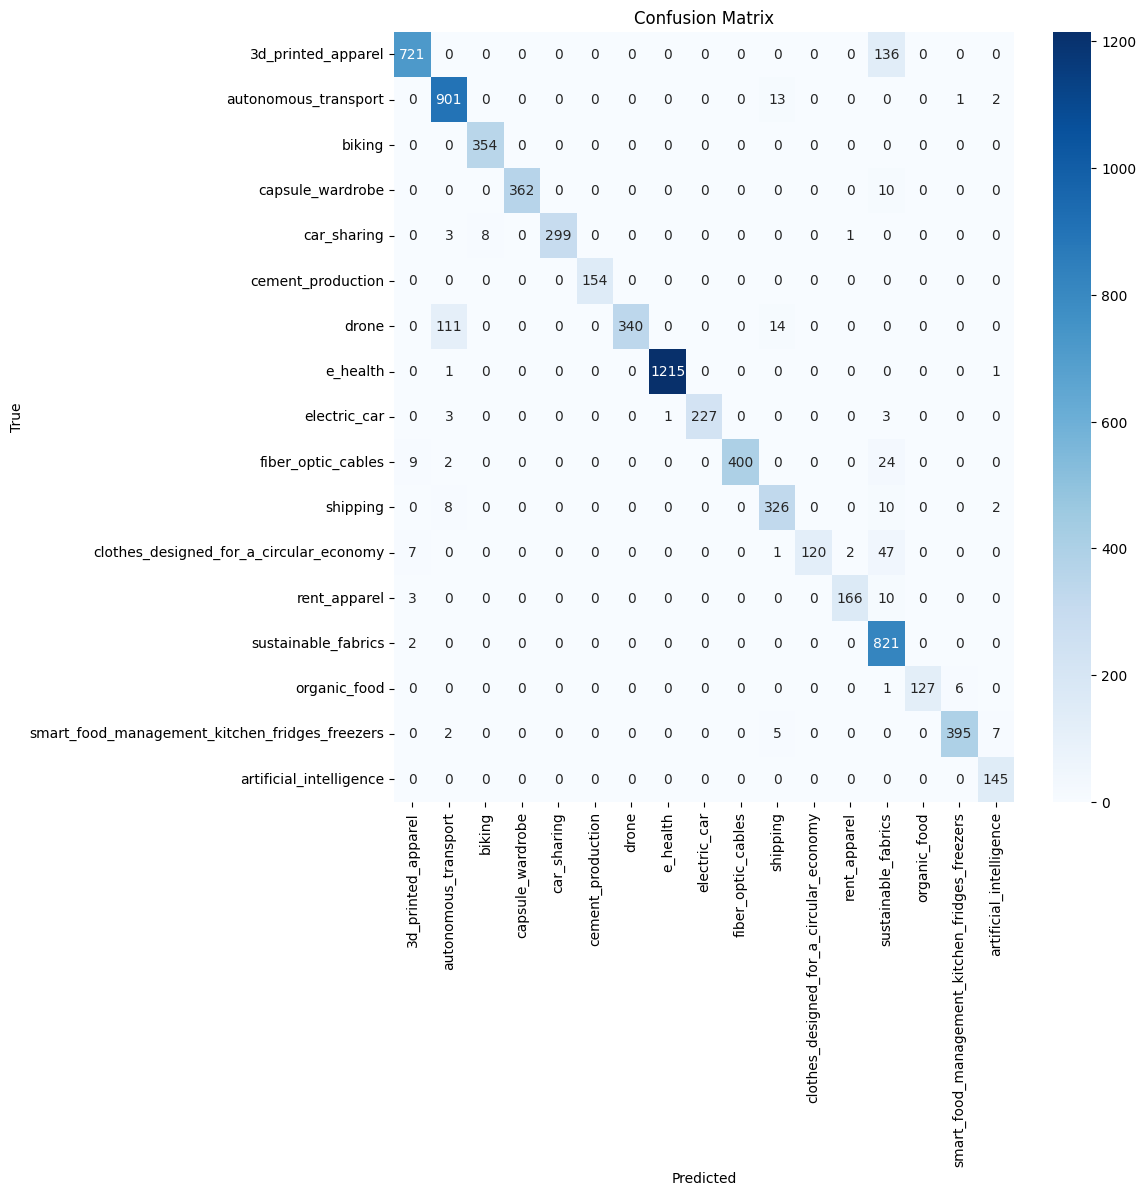

In [10]:

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True") 
plt.title("Confusion Matrix")
plt.show()